# Importing Libraries

In [206]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy
warnings.filterwarnings('ignore')
import time
%matplotlib inline
import missingno as mso
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Reading Data Set

In [298]:
#Reading Data Set
df = pd.read_csv("train_BRCpofr.csv")

In [299]:
df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [300]:
df.shape

(89392, 12)

# Data Exploration

In [301]:
Data = df.copy()

In [302]:
Data_cat = [var for var in Data.columns if Data[var].dtype == 'O']
print('There are {} categorical variables in Data \n'.format(len(Data_cat)))
print('Categorical Variables are :', Data_cat)

There are 7 categorical variables in Data 

Categorical Variables are : ['gender', 'area', 'qualification', 'income', 'num_policies', 'policy', 'type_of_policy']


In [303]:
Data_num = [num for num in Data.columns if Data[num].dtype != 'O']
print('There are {} numerical variable in Data \n'.format(len(Data_num)))
print("Numerical Variables are", Data_num)

There are 5 numerical variable in Data 

Numerical Variables are ['id', 'marital_status', 'vintage', 'claim_amount', 'cltv']


In [304]:
print("The total number of Columns in Data are :", len(Data.columns))

The total number of Columns in Data are : 12


In [305]:
Data[["claim_amount","cltv"]].describe()

,claim_amount,cltv
count,89392.000000,89392.000000
mean,4351.502416,97952.828978
std,3262.359775,90613.814793
min,0.000000,24828.000000
25%,2406.000000,52836.000000
50%,4089.000000,66396.000000
75%,6094.000000,103440.000000
max,31894.000000,724068.000000


In [306]:
Data.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

<AxesSubplot:>

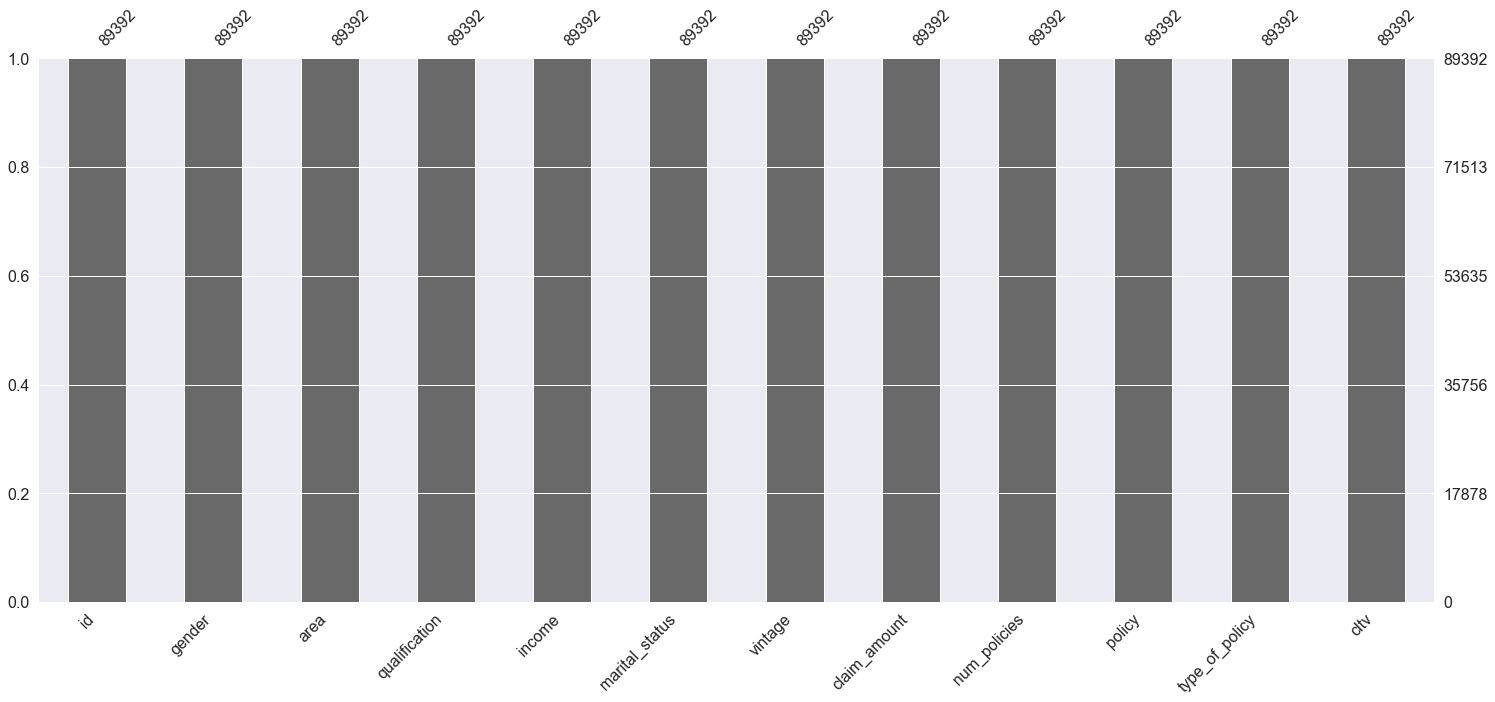

In [307]:
mso.bar(Data) #Missing Values

## Univariate Analysis

### Target Variable in Data

#### CLTV

In [308]:
Data[["cltv"]].head()

,cltv
0,64308
1,515400
2,64212
3,97920
4,59736


In [309]:
print("Null Value in CLTV :", Data['cltv'].isnull().sum())

Null Value in CLTV : 0


In [310]:
print("Number of Unique Values in CLTV :", Data['cltv'].nunique())

Number of Unique Values in CLTV : 18796


In [311]:
print(Data['cltv'].describe())

count     89392.000000
mean      97952.828978
std       90613.814793
min       24828.000000
25%       52836.000000
50%       66396.000000
75%      103440.000000
max      724068.000000
Name: cltv, dtype: float64


Text(0.5, 0, 'CLTV')

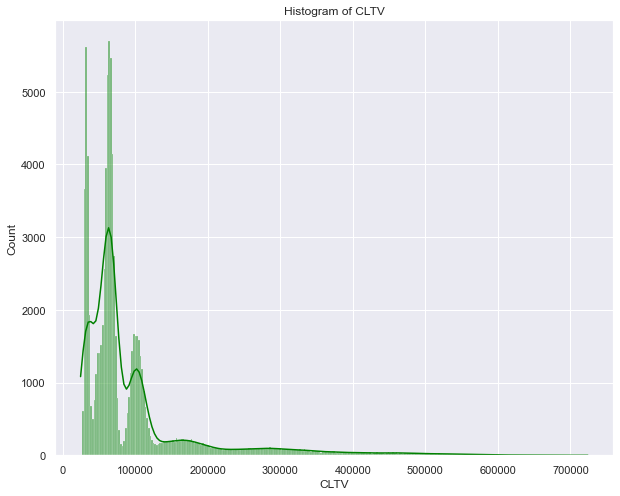

In [312]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(data=Data, x="cltv", kde=True, color='green')
ax.set_title('Histogram of CLTV')
ax.set_xlabel('CLTV')

Text(0, 0.5, 'CLTV')

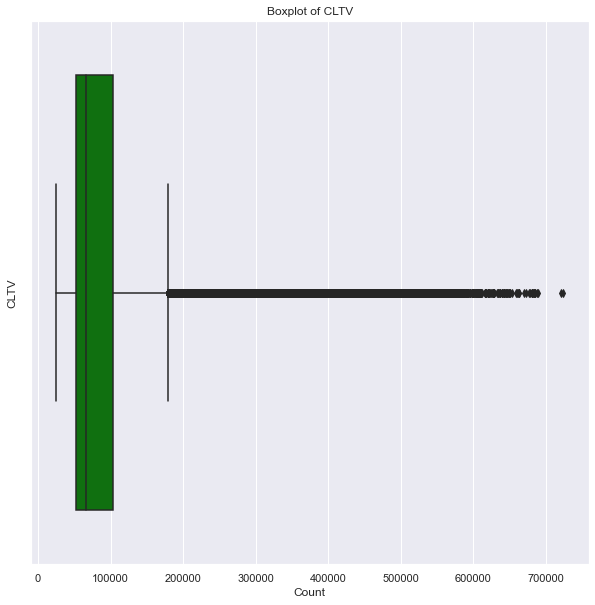

In [313]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x="cltv", data = Data, color='green')
ax.set_title('Boxplot of CLTV')
ax.set_xlabel('Count')
ax.set_ylabel('CLTV')

In [314]:
count_NotNullValues_CLTV = len(Data[Data.cltv.notnull()])
count_NullValues_CLTV = len(Data[Data.cltv.isnull()])

print("Percentage of Not Null Values: {:.2f}%".format((count_NotNullValues_CLTV / (len(Data.cltv)))*100))
print("Missing values percentage: {:.2f}%".format((count_NullValues_CLTV / (len(Data.cltv)))*100))

Percentage of Not Null Values: 100.00%
Missing values percentage: 0.00%


### Categorical Variable in Train Data

#### ID

In [315]:
Data[["id"]].head()

,id
0,1
1,2
2,3
3,4
4,5


In [316]:
Data.drop("id", inplace = True, axis =1)

In [317]:
Data.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [318]:
len(Data.columns)

11

####  Gender

In [319]:
Data[["gender"]].head()

,gender
0,Male
1,Male
2,Male
3,Female
4,Male


In [320]:
print("Null Value in Gender :", Data['gender'].isnull().sum())
print("Number of Unique Values in Gender :", Data['gender'].nunique())

Null Value in Gender : 0
Number of Unique Values in Gender : 2


In [321]:
print("Number of Male and Females in Gender are :\n", Data['gender'].value_counts())

Number of Male and Females in Gender are :
 Male      50497
Female    38895
Name: gender, dtype: int64


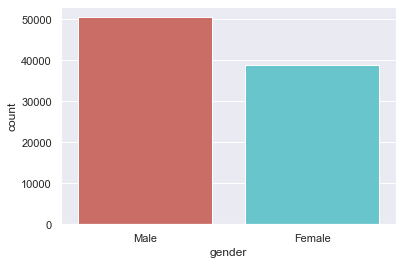

In [322]:
sns.countplot(x = "gender", data = Data, palette = "hls")
plt.show()

In [323]:
Data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [324]:
countMale = len(Data[Data.gender == 'Male'])
countFemale = len(Data[Data.gender == 'Female'])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(Data.gender)))*100))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(Data.gender)))*100))

Percentage of Male applicant: 56.49%
Percentage of Female applicant: 43.51%


#### Area

In [325]:
Data[["area"]].head()

,area
0,Urban
1,Rural
2,Urban
3,Rural
4,Urban


In [326]:
print("Null Value in Area :", Data['area'].isnull().sum())

Null Value in Area : 0


In [327]:
print("Number of Unique Values in area :", Data['area'].nunique())

Number of Unique Values in area : 2


In [328]:
print("Number of Urban and Rural in Area are :\n", Data['area'].value_counts())

Number of Urban and Rural in Area are :
 Urban    62455
Rural    26937
Name: area, dtype: int64


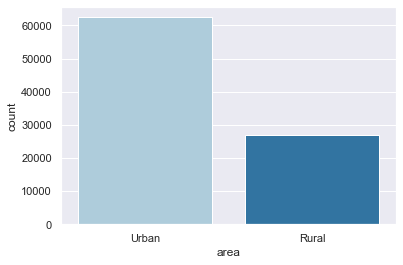

In [329]:
sns.countplot(x = "area", data = Data, palette = "Paired")
plt.show()

In [330]:
countrural = len(Data[Data.area == 'Rural'])
counturban = len(Data[Data.area == 'Urban'])

print("Percentage of Rural: {:.2f}%".format((countrural / (len(Data.area)))*100))
print("Percentage of Urban applicant: {:.2f}%".format((counturban / (len(Data.area)))*100))

Percentage of Rural: 30.13%
Percentage of Urban applicant: 69.87%


#### Qualification

In [331]:
Data[["qualification"]].head()

,qualification
0,Bachelor
1,High School
2,Bachelor
3,High School
4,High School


In [332]:
print("Null Value in Qualification :", Data['qualification'].isnull().sum())

Null Value in Qualification : 0


In [333]:
print("Number of Unique Values in Qualification :", Data['qualification'].nunique())

Number of Unique Values in Qualification : 3


In [334]:
print("Number of High School, Bachelor, Others in Qualification are :\n", Data['qualification'].value_counts())

Number of High School, Bachelor, Others in Qualification are :
 High School    46247
Bachelor       39399
Others          3746
Name: qualification, dtype: int64


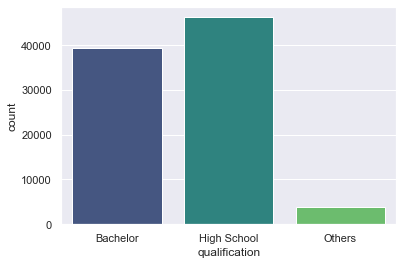

In [335]:
sns.countplot(x="qualification", data=Data, palette="viridis")
plt.show()

In [336]:
count_highschool = len(Data[Data.qualification == 'High School'])
count_bachelor = len(Data[Data.qualification == 'Bachelor'])
count_others = len(Data[Data.qualification == 'Others'])

print("Percentage of High School Qualification: {:.2f}%".format((count_highschool / (len(Data.qualification)))*100))
print("Percentage of Bachelor Qualification: {:.2f}%".format((count_bachelor / (len(Data.qualification)))*100))
print("Percentage of Others Qualification: {:.2f}%".format((count_others / (len(Data.qualification)))*100))

Percentage of High School Qualification: 51.74%
Percentage of Bachelor Qualification: 44.07%
Percentage of Others Qualification: 4.19%


#### Income

In [337]:
Data[["income"]].head(6)

,income
0,5L-10L
1,5L-10L
2,5L-10L
3,5L-10L
4,More than 10L
5,More than 10L


In [338]:
print("Null Value in income :", Data['income'].isnull().sum())

Null Value in income : 0


In [339]:
print("Number of Unique Values in income :", Data['income'].nunique())

Number of Unique Values in income : 4


In [340]:
print("Number of Income levels are :\n", Data['income'].value_counts())

Number of Income levels are :
 5L-10L           52716
2L-5L            21158
More than 10L    13664
<=2L              1854
Name: income, dtype: int64


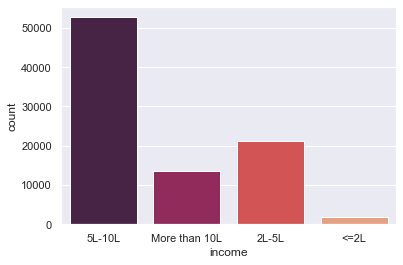

In [341]:
sns.countplot(x="income", data=Data, palette="rocket")
plt.show()

In [342]:
count_less2l = len(Data[Data.income == '<=2L'])
count_2lto5l = len(Data[Data.income == '2L-5L'])
count_5lto10l = len(Data[Data.income == '5L-10L'])
count_more10l = len(Data[Data.income == 'More than 10L'])

print("Percentage of Less than 2L: {:.2f}%".format((count_less2l / (len(Data.income)))*100))
print("Percentage of 2L to 5L: {:.2f}%".format((count_2lto5l / (len(Data.income)))*100))
print("Percentage of 5L to 10L: {:.2f}%".format((count_5lto10l / (len(Data.income)))*100))
print("Percentage of More than 10L: {:.2f}%".format((count_more10l / (len(Data.income)))*100))

Percentage of Less than 2L: 2.07%
Percentage of 2L to 5L: 23.67%
Percentage of 5L to 10L: 58.97%
Percentage of More than 10L: 15.29%


#### Marital Status

In [343]:
Data[["marital_status"]].head(5)

,marital_status
0,1
1,0
2,1
3,0
4,1


In [344]:
print("Null Value in Marital Status :", Data['marital_status'].isnull().sum())

Null Value in Marital Status : 0


In [345]:
print("Number of Unique Values in Marital Status :", Data['marital_status'].nunique())

Number of Unique Values in Marital Status : 2


In [346]:
print("Number of Yes and No in Marital Status are :\n", Data['marital_status'].value_counts())

Number of Yes and No in Marital Status are :
 1    51444
0    37948
Name: marital_status, dtype: int64


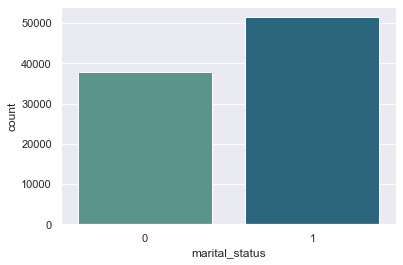

In [347]:
sns.countplot(x="marital_status", data=Data, palette="crest")
plt.show()

In [348]:
countNo = len(Data[Data.marital_status == 0])
countYes = len(Data[Data.marital_status == 1])

print("Percentage of Not Married Applicants: {:.2f}%".format((countNo / (len(Data.marital_status)))*100))
print("Percentage of Married Applicants: {:.2f}%".format((countYes / (len(Data.marital_status)))*100))

Percentage of Not Married Applicants: 42.45%
Percentage of Married Applicants: 57.55%


#### Vintage

In [349]:
Data[["vintage"]].head(5)

,vintage
0,5
1,8
2,8
3,7
4,6


In [350]:
print("Null Value in Vintage :", Data['vintage'].isnull().sum())

Null Value in Vintage : 0


In [351]:
print("Number of Vintages are :\n", Data['vintage'].value_counts())

Number of Vintages are :
 6    17769
7    13095
5    12481
4    10471
2     9165
1     7671
8     7624
3     7085
0     4031
Name: vintage, dtype: int64


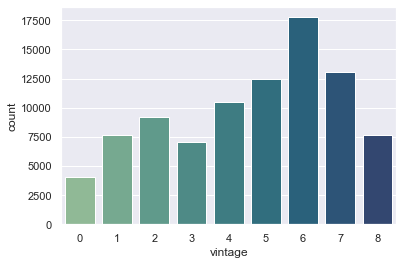

In [352]:
sns.countplot(x="vintage", data=Data, palette="crest")
plt.show()

In [353]:
count_0 = len(Data[Data.vintage == 0])
count_1 = len(Data[Data.vintage == 1])
count_2 = len(Data[Data.vintage == 2])
count_3 = len(Data[Data.vintage == 3])
count_4 = len(Data[Data.vintage == 4])
count_5 = len(Data[Data.vintage == 5])
count_6 = len(Data[Data.vintage == 6])
count_7 = len(Data[Data.vintage == 7])
count_8 = len(Data[Data.vintage == 8])

print("Percentage of 0 vintage: {:.2f}%".format((count_0 / (len(Data.vintage)))*100))
print("Percentage of 1 vintage: {:.2f}%".format((count_1 / (len(Data.vintage)))*100))
print("Percentage of 2 vintage: {:.2f}%".format((count_2 / (len(Data.vintage)))*100))
print("Percentage of 3 vintage: {:.2f}%".format((count_3 / (len(Data.vintage)))*100))
print("Percentage of 4 vintage: {:.2f}%".format((count_4 / (len(Data.vintage)))*100))
print("Percentage of 5 vintage: {:.2f}%".format((count_5 / (len(Data.vintage)))*100))
print("Percentage of 6 vintage: {:.2f}%".format((count_6 / (len(Data.vintage)))*100))
print("Percentage of 7 vintage: {:.2f}%".format((count_7 / (len(Data.vintage)))*100))
print("Percentage of 8 vintage: {:.2f}%".format((count_8 / (len(Data.vintage)))*100))

Percentage of 0 vintage: 4.51%
Percentage of 1 vintage: 8.58%
Percentage of 2 vintage: 10.25%
Percentage of 3 vintage: 7.93%
Percentage of 4 vintage: 11.71%
Percentage of 5 vintage: 13.96%
Percentage of 6 vintage: 19.88%
Percentage of 7 vintage: 14.65%
Percentage of 8 vintage: 8.53%


#### Num-Policies

In [354]:
Data[["num_policies"]].head(8)

,num_policies
0,More than 1
1,More than 1
2,More than 1
3,More than 1
4,More than 1
5,1
6,More than 1
7,More than 1


In [355]:
print("Null Value in Number of Policies Variable are :", Data['num_policies'].isnull().sum())

Null Value in Number of Policies Variable are : 0


In [356]:
print("Number of Unique Values in Number of Policies Variable are :", Data['num_policies'].nunique())

Number of Unique Values in Number of Policies Variable are : 2


In [357]:
print("Number of Policies that Applicants hold are :\n", Data['num_policies'].value_counts())

Number of Policies that Applicants hold are :
 More than 1    60263
1              29129
Name: num_policies, dtype: int64


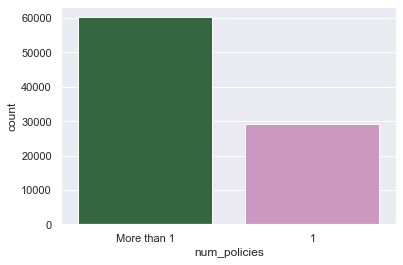

In [358]:
sns.countplot(x="num_policies", data=Data, palette="cubehelix")
plt.show()

In [359]:
count1 = len(Data[Data.num_policies == '1'])
count1more = len(Data[Data.num_policies == 'More than 1'])

print("Percentage of 1 Policy Holder Applicants: {:.2f}%".format((count1 / (len(Data.num_policies)))*100))
print("Percentage of More than 1 Policy Holder Applicants: {:.2f}%".format((count1more / (len(Data.num_policies)))*100))

Percentage of 1 Policy Holder Applicants: 32.59%
Percentage of More than 1 Policy Holder Applicants: 67.41%


#### Active Policy of a customer

In [360]:
Data.policy.head(10)

0    A
1    A
2    A
3    A
4    A
5    C
6    A
7    A
8    A
9    A
Name: policy, dtype: object

In [361]:
print("Null Value in Policy Variable are :", Data['policy'].isnull().sum())

Null Value in Policy Variable are : 0


In [362]:
print("Number of Unique Values in Policy Variable :", Data['policy'].nunique())

Number of Unique Values in Policy Variable : 3


In [363]:
print("Number of A, B, C in Policy are :\n", Data['policy'].value_counts())

Number of A, B, C in Policy are :
 A    56644
B    24635
C     8113
Name: policy, dtype: int64


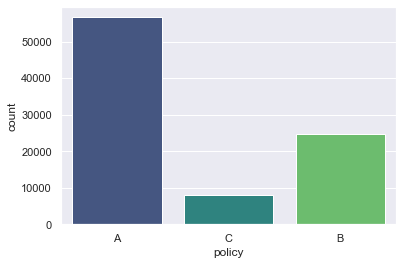

In [364]:
sns.countplot(x="policy", data=Data, palette="viridis")
plt.show()

In [365]:
countA = len(Data[Data.policy == 'A'])
countB = len(Data[Data.policy == 'B'])
countC = len(Data[Data.policy == 'C'])

print("Percentage of A Policy Holder Applicants: {:.2f}%".format((countA / (len(Data.policy)))*100))
print("Percentage of B Policy Holder Applicants: {:.2f}%".format((countB / (len(Data.policy)))*100))
print("Percentage of c Policy Holder Applicants: {:.2f}%".format((countC / (len(Data.policy)))*100))

Percentage of A Policy Holder Applicants: 63.37%
Percentage of B Policy Holder Applicants: 27.56%
Percentage of c Policy Holder Applicants: 9.08%


#### Type of Policy

In [366]:
df[["type_of_policy"]].head()

,type_of_policy
0,Platinum
1,Platinum
2,Platinum
3,Platinum
4,Gold


In [367]:
print("Null Value in Types of Policy Variable are :", Data['type_of_policy'].isnull().sum())

Null Value in Types of Policy Variable are : 0


In [368]:
print("Number of Unique Values in Types of Policy Variable are :", Data['type_of_policy'].nunique())

Number of Unique Values in Types of Policy Variable are : 3


In [369]:
print("Number of Platinum, Gold and Silver in Policy are :\n", Data['type_of_policy'].value_counts())

Number of Platinum, Gold and Silver in Policy are :
 Platinum    47796
Silver      21010
Gold        20586
Name: type_of_policy, dtype: int64


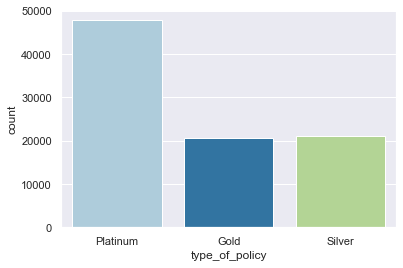

In [370]:
sns.countplot(x = "type_of_policy", data = Data, palette = "Paired")
plt.show()

In [371]:
countPlatinum = len(Data[Data.type_of_policy == 'Platinum'])
countGold = len(Data[Data.type_of_policy == 'Gold'])
countSilver = len(Data[Data.type_of_policy == 'Silver'])

print("Percentage of Platinum Policy holder Applicants: {:.2f}%".format((countPlatinum / (len(Data.type_of_policy)))*100))
print("Percentage of Gold Policy holder Applicants: {:.2f}%".format((countGold / (len(Data.type_of_policy)))*100))
print("Percentage of Silver Policy holder Applicants: {:.2f}%".format((countSilver / (len(Data.type_of_policy)))*100))

Percentage of Platinum Policy holder Applicants: 53.47%
Percentage of Gold Policy holder Applicants: 23.03%
Percentage of Silver Policy holder Applicants: 23.50%


### Numerical Variable in Train Data

#### Claim Amount

In [372]:
df[["claim_amount"]].head()

,claim_amount
0,5790
1,5080
2,2599
3,0
4,3508


In [373]:
print("Null Value in Claim Amount :", Data['claim_amount'].isnull().sum())

Null Value in Claim Amount : 0


In [374]:
print("Number of Unique Values in Claim Amount :", Data['claim_amount'].nunique())

Number of Unique Values in Claim Amount : 10889


In [375]:
print(Data['claim_amount'].describe())

count    89392.000000
mean      4351.502416
std       3262.359775
min          0.000000
25%       2406.000000
50%       4089.000000
75%       6094.000000
max      31894.000000
Name: claim_amount, dtype: float64


Text(0.5, 0, 'Claim Amount')

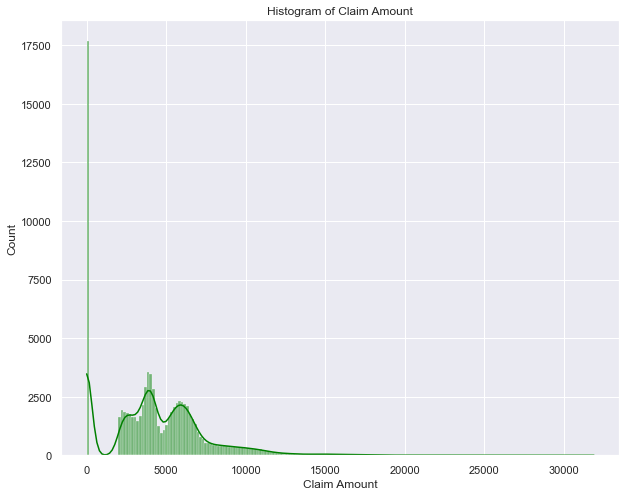

In [376]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(data=Data, x="claim_amount", kde=True, color='green')
ax.set_title('Histogram of Claim Amount')
ax.set_xlabel('Claim Amount')

Text(0, 0.5, 'Claim Amount')

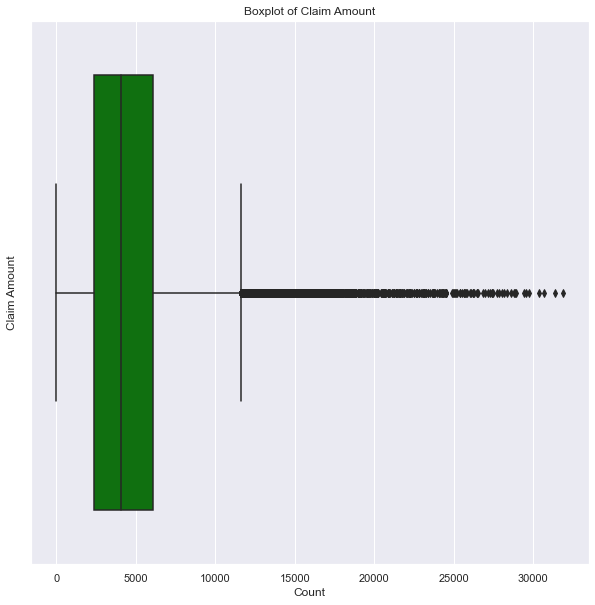

In [377]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x="claim_amount", data = Data, color='green')
ax.set_title('Boxplot of Claim Amount')
ax.set_xlabel('Count')
ax.set_ylabel('Claim Amount')

In [378]:
count_NotNullValues_claimamount = len(Data[Data.claim_amount.notnull()])
count_NullValues_claimamount = len(Data[Data.claim_amount.isnull()])

print("Percentage of Not Null Values: {:.2f}%".format((count_NotNullValues_claimamount / (len(Data.claim_amount)))*100))
print("Missing values percentage: {:.2f}%".format((count_NullValues_claimamount / (len(Data.claim_amount)))*100))

Percentage of Not Null Values: 100.00%
Missing values percentage: 0.00%


## Bi Variate Analysis

In [686]:
cols = ['gender', 'area', 'qualification', 'income', 'marital_status','vintage', 'num_policies', 'policy', 'type_of_policy']

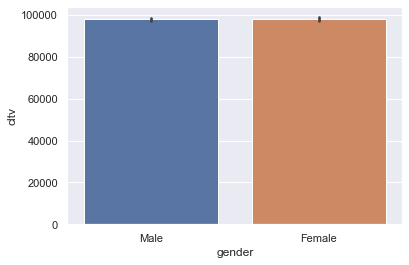

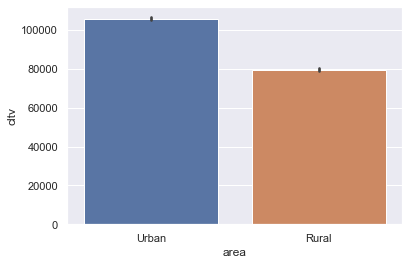

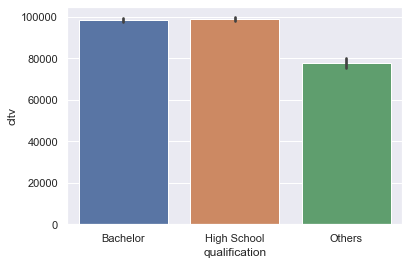

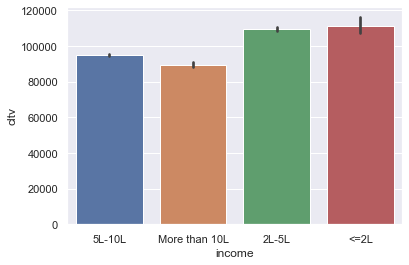

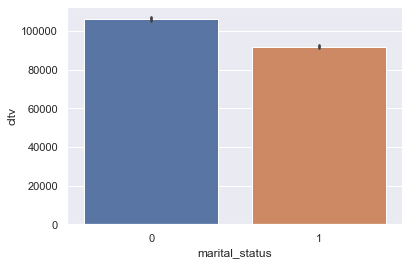

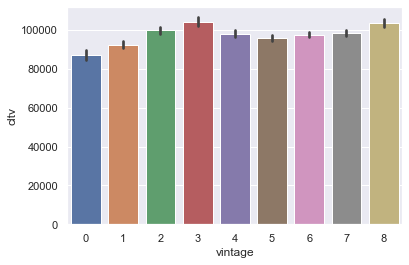

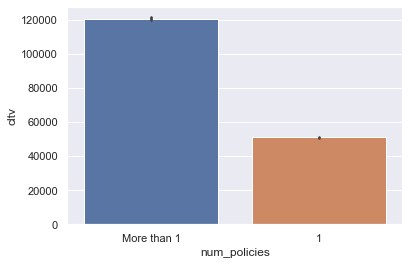

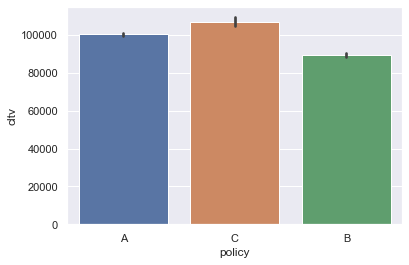

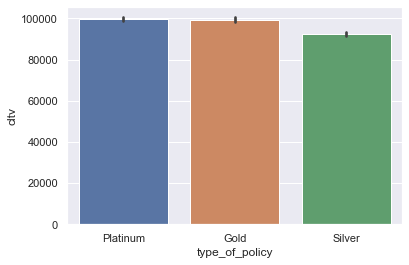

In [687]:
for i in cols:
    sns.barplot(x = i,y='cltv',data = Data)
    plt.show()

Customer Lifetime Value is different for every variable expect Gender , as we can also see that visually which make's sense. Our mode is not biased based on gender, but still we can see that the average customer lifetime value is the same for both male and female.

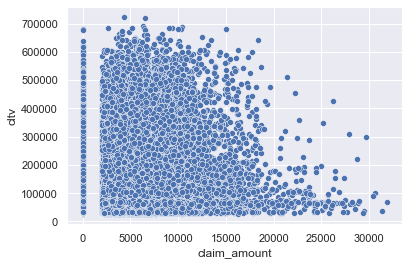

In [689]:
ax = sns.scatterplot(y='cltv', x='claim_amount',data = Data)
plt.show()

We can clearly see that no linear relationship between claim amount and cltv.

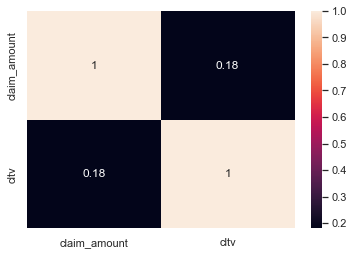

In [690]:
sns.heatmap(Data[['claim_amount', 'cltv']].corr(),annot = True)
plt.show()

## Treatment of outliers

In [692]:
data_copy = Data.copy()

In [693]:
outliers = []
def detect_outliers_iqr(data_copy):
    data_copy = sorted(data_copy)
    q1 = np.percentile(data_copy, 25)
    q3 = np.percentile(data_copy, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data_copy: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(data_copy["claim_amount"])
print("Outliers from IQR method: ", (len(sample_outliers)/data_copy.shape[0])*100)

Outliers from IQR method:  2.525953105423304


In [694]:
q1 = np.percentile(sorted(data_copy['claim_amount']), 25)
q3 = np.percentile(sorted(data_copy['claim_amount']), 75)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)

In [698]:
data_copy["claim_amount"]=np.where((data_copy["claim_amount"]>upr_bound),data_copy["claim_amount"].median(),data_copy["claim_amount"])

In [699]:
data_copy["claim_amount"]=np.where((data_copy["claim_amount"]<lwr_bound),data_copy["claim_amount"].median(),data_copy["claim_amount"])

In [700]:
outliers = []
def detect_outliers_iqr(data_copy):
    data_copy = sorted(data_copy)
    q1 = np.percentile(data_copy, 25)
    q3 = np.percentile(data_copy, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data_copy: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(data_copy["claim_amount"])
print("Outliers from IQR method: ", (len(sample_outliers)/data_copy.shape[0])*100)

Outliers from IQR method:  0.4508233398961876


Still there are some outliers left

In [878]:
#% outliers
for k, v in tips_ds_rs_df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(tips_ds_rs_df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column cltv outliers = 11.44%


Target Column has outlier but we cannot treat this.

## Encoding

In [701]:
data_copy = pd.get_dummies(data_copy, drop_first= True)

In [702]:
data_copy.head()

,marital_status,vintage,claim_amount,cltv,gender_Male,area_Urban,qualification_High School,qualification_Others,income_5L-10L,income_<=2L,income_More than 10L,num_policies_More than 1,policy_B,policy_C,type_of_policy_Platinum,type_of_policy_Silver
0,1,5,5790.0,64308,1,1,0,0,1,0,0,1,0,0,1,0
1,0,8,5080.0,515400,1,0,1,0,1,0,0,1,0,0,1,0
2,1,8,2599.0,64212,1,1,0,0,1,0,0,1,0,0,1,0
3,0,7,0.0,97920,0,0,1,0,1,0,0,1,0,0,1,0
4,1,6,3508.0,59736,1,1,1,0,0,0,1,1,0,0,0,0


## Correlation

<AxesSubplot:>

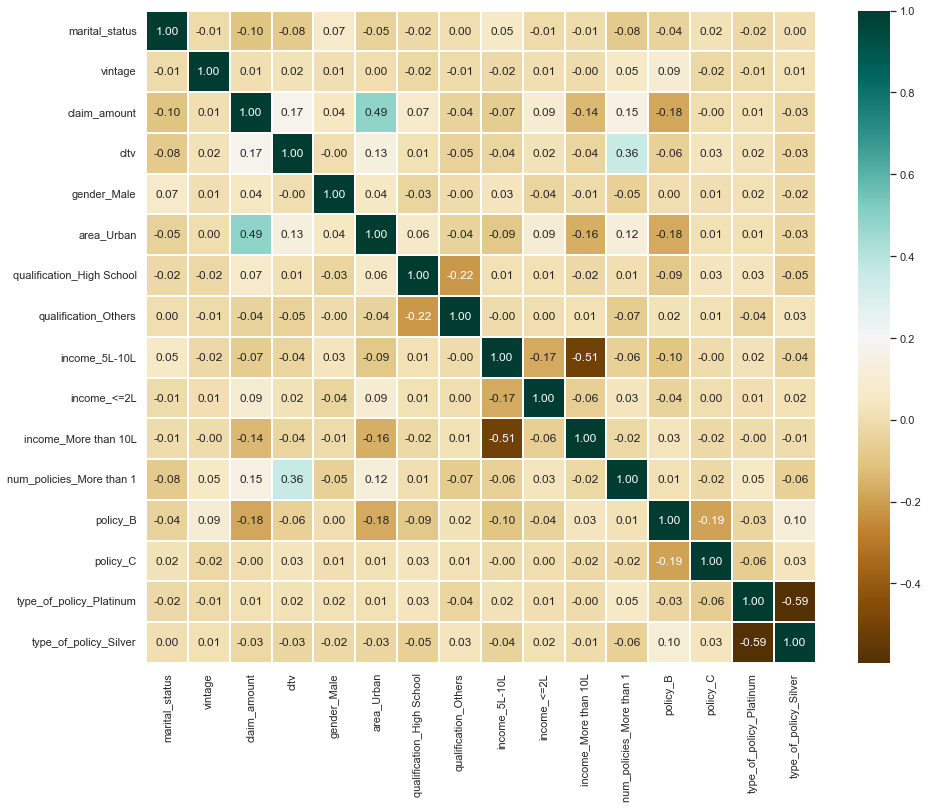

In [706]:
plt.figure(figsize=(15,12))
sns.heatmap(data_copy.corr(), annot=True, fmt= '.2f', cmap='BrBG', linewidths = 2)

In [873]:
data_copy.corr()['cltv']

marital_status              -0.077744
vintage                      0.020608
claim_amount                 0.171829
cltv                         1.000000
gender_Male                 -0.001318
area_Urban                   0.133107
qualification_High School    0.013329
qualification_Others        -0.046898
income_5L-10L               -0.038249
income_<=2L                  0.021668
income_More than 10L        -0.039879
num_policies_More than 1     0.360414
policy_B                    -0.058261
policy_C                     0.031613
type_of_policy_Platinum      0.021295
type_of_policy_Silver       -0.033617
Name: cltv, dtype: float64

## Train Test Split

In [939]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3)
xtrain.shape, xtest.shape

((62574, 15), (26818, 15))

## Regression

### Base Model

In [719]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

In [882]:
X = data_copy.drop(['cltv'], axis = 1)
y = data_copy[['cltv']]

In [883]:
x = sm.add_constant(X)
est = sm.OLS(y,x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cltv   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     1059.
Date:                Sun, 22 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:43:06   Log-Likelihood:            -1.1399e+06
No. Observations:               89392   AIC:                         2.280e+06
Df Residuals:                   89376   BIC:                         2.280e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      4.626e+04   1380.792     33.505      0.000    4.36e+04     4.9e+04
marital_status            -7526.5092    572.465    -13.148      0.000   -8648.535   -6404.483
vintage                     234.0869    122.700      1.908      0.056      -6.404     474.577
claim_amount                  2.9621      0.119     24.813      0.000       2.728       3.196
gender_Male                2578.7993    568.038      4.540      0.000    1465.449    3692.149
area_Urban                 6297.0531    714.877      8.809      0.000    4895.901    7698.206
qualification_High School  -925.3243    576.605     -1.605      0.109   -2055.464     204.816
qualification_Others      -8018.5734   1432.976     -5.596      0.000   -1.08e+04   -5209.954
income_5L-10L             -4921.2259    704.033     -6.990      0.000   -6301.124   -3541.328
income_<=2L               -4712.0566   2029.718     -2.322      0.020   -8690.286    -733.828
income_More than 10L      -6899.1849    950.509     -7.258      0.000   -8762.173   -5036.197
num_policies_More than 1   6.532e+04    610.159    107.057      0.000    6.41e+04    6.65e+04
policy_B                  -7584.5282    669.236    -11.333      0.000   -8896.225   -6272.831
policy_C                   9871.6565    995.999      9.911      0.000    7919.507    1.18e+04
type_of_policy_Platinum    -751.1945    698.217     -1.076      0.282   -2119.692     617.303
type_of_policy_Silver     -2413.4790    825.935     -2.922      0.003   -4032.304    -794.654
==============================================================================
Omnibus:                    51212.700   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           404079.304
Skew:                           2.734   Prob(JB):                         0.00
Kurtosis:                      11.865   Cond. No.                     3.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Trying some transformation

In [879]:
X_sqrt = X.copy()

In [880]:
X_sqrt['claim_amount'] = np.sqrt(X_sqrt['claim_amount'])

In [881]:
y_sqrt = y.copy()

In [884]:
y_sqrt['cltv'] = np.sqrt(y_sqrt['cltv'])

In [885]:
x = sm.add_constant(X_sqrt)
est = sm.OLS(y_sqrt,x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cltv   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     1732.
Date:                Sun, 22 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:43:56   Log-Likelihood:            -5.3758e+05
No. Observations:               89392   AIC:                         1.075e+06
Df Residuals:                   89376   BIC:                         1.075e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       212.2013      1.668    127.229      0.000     208.932     215.470
marital_status               -9.9143      0.678    -14.629      0.000     -11.243      -8.586
vintage                       0.4235      0.145      2.912      0.004       0.138       0.709
claim_amount                  0.2847      0.013     22.054      0.000       0.259       0.310
gender_Male                   2.2752      0.674      3.378      0.001       0.955       3.595
area_Urban                    8.1285      0.861      9.443      0.000       6.441       9.816
qualification_High School    -1.0191      0.683     -1.491      0.136      -2.358       0.320
qualification_Others        -11.7439      1.698     -6.914      0.000     -15.073      -8.415
income_5L-10L                -6.6101      0.834     -7.926      0.000      -8.245      -4.975
income_<=2L                  -5.3246      2.406     -2.213      0.027     -10.039      -0.610
income_More than 10L         -9.0842      1.127     -8.063      0.000     -11.292      -6.876
num_policies_More than 1    103.6574      0.723    143.326      0.000     102.240     105.075
policy_B                     -9.5773      0.793    -12.076      0.000     -11.132      -8.023
policy_C                     11.6446      1.180      9.865      0.000       9.331      13.958
type_of_policy_Platinum      -0.7852      0.828     -0.949      0.343      -2.407       0.837
type_of_policy_Silver        -3.1958      0.979     -3.265      0.001      -5.114      -1.277
==============================================================================
Omnibus:                    33195.988   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           117355.028
Skew:                           1.897   Prob(JB):                         0.00
Kurtosis:                       7.136   Cond. No.                         474.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Try Pca 

In [912]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X)
XtrainPCA = pca.transform(X)
XtrainPCA.shape

(89392, 10)

In [913]:
pca.explained_variance_ratio_

array([9.99999006e-01, 6.96520285e-07, 4.67978536e-08, 4.05091619e-08,
       3.52991939e-08, 3.31582920e-08, 2.98787336e-08, 2.76112216e-08,
       2.55928626e-08, 2.04749187e-08])

In [914]:
PC = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
pca_df = pd.DataFrame({'var':pca.explained_variance_ratio_, 'PC':PC})
pca_df

,var,PC
0,9.999990e-01,PC1
1,6.965203e-07,PC2
2,4.679785e-08,PC3
3,4.050916e-08,PC4
4,3.529919e-08,PC5
5,3.315829e-08,PC6
6,2.987873e-08,PC7
7,2.761122e-08,PC8
8,2.559286e-08,PC9
9,2.047492e-08,PC10


In [915]:
x = sm.add_constant(XtrainPCA)
est = sm.OLS(y,x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cltv   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     1574.
Date:                Sun, 22 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:58:14   Log-Likelihood:            -1.1399e+06
No. Observations:               89392   AIC:                         2.280e+06
Df Residuals:                   89381   BIC:                         2.280e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.795e+04    279.482    350.480      0.000    9.74e+04    9.85e+04
x1             5.6719      0.102     55.710      0.000       5.472       5.871
x2          -799.1479    121.990     -6.551      0.000   -1038.248    -560.048
x3         -7623.7075    470.629    -16.199      0.000   -8546.136   -6701.279
x4          1.579e+04    505.842     31.214      0.000    1.48e+04    1.68e+04
x5         -1.402e+04    541.888    -25.877      0.000   -1.51e+04    -1.3e+04
x6         -1.348e+04    559.108    -24.108      0.000   -1.46e+04   -1.24e+04
x7         -6563.8143    588.994    -11.144      0.000   -7718.237   -5409.392
x8         -6.003e+04    612.702    -97.980      0.000   -6.12e+04   -5.88e+04
x9         -5035.4109    636.403     -7.912      0.000   -6282.755   -3788.067
x10         1.265e+04    711.510     17.774      0.000    1.13e+04     1.4e+04
==============================================================================
Omnibus:                    51248.608   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           404519.133
Skew:                           2.736   Prob(JB):                         0.00
Kurtosis:                      11.869   Cond. No.                     6.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Did not increase R^2

## Random Forest with Hyper Perameter Tuning

In [888]:
from sklearn.ensemble import RandomForestRegressor

In [893]:
rf = RandomForestRegressor(random_state=42)

In [895]:
rf.fit(xtrain,ytrain)

RandomForestRegressor(random_state=42)

In [896]:
pred2=rf.predict(xtest)

In [897]:
from sklearn import metrics
metrics.r2_score(ytest,pred2)

0.01834118711073296

In [902]:
importances = rf.feature_importances_

Text(0.5, 0, 'Random Forest Feature Importance')

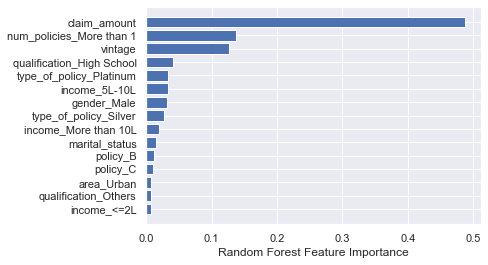

In [903]:
sorted_idx = importances.argsort()
plt.barh(X.columns[sorted_idx], importances[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## GBM

In [916]:
from sklearn.ensemble import GradientBoostingRegressor

In [940]:
gbr = GradientBoostingRegressor(random_state=42, n_estimators=600, max_depth=5, learning_rate=0.01, min_samples_split=3)

In [941]:
gbr.fit(xtrain, ytrain)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, min_samples_split=3,
                          n_estimators=600, random_state=42)

In [942]:
ypred = gbr.predict(xtest)

In [943]:
metrics.r2_score(ytest, ypred)

0.1623211527933225

# TEST DATA

In [932]:
test_df = pd.read_csv("test_koRSKBP.csv")

In [933]:
test_df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [934]:
test_copy = test_df.copy()

In [935]:
outliers = []
def detect_outliers_iqr(test_copy):
    test_copy = sorted(test_copy)
    q1 = np.percentile(test_copy, 25)
    q3 = np.percentile(test_copy, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in test_copy: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(test_copy["claim_amount"])
print("Outliers from IQR method: ", (len(sample_outliers)/test_copy.shape[0])*100)

Outliers from IQR method:  2.6059233157144055


In [936]:
q1 = np.percentile(sorted(test_copy['claim_amount']), 25)
q3 = np.percentile(sorted(test_copy['claim_amount']), 75)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
test_copy["claim_amount"]=np.where((test_copy["claim_amount"]>upr_bound),test_copy["claim_amount"].median(),test_copy["claim_amount"])
test_copy["claim_amount"]=np.where((test_copy["claim_amount"]<lwr_bound),test_copy["claim_amount"].median(),test_copy["claim_amount"])

In [937]:
test_copy = pd.get_dummies(test_copy, drop_first= True)

In [938]:
test_copy.head()

,id,marital_status,vintage,claim_amount,gender_Male,area_Urban,qualification_High School,qualification_Others,income_5L-10L,income_<=2L,income_More than 10L,num_policies_More than 1,policy_B,policy_C,type_of_policy_Platinum,type_of_policy_Silver
0,89393,0,6,2134.0,0,0,1,0,1,0,0,1,1,0,0,1
1,89394,0,4,4102.0,0,1,1,0,0,0,0,1,0,0,1,0
2,89395,1,7,2925.0,1,0,1,0,1,0,0,1,1,0,0,0
3,89396,1,2,0.0,0,0,0,0,0,0,1,1,1,0,0,1
4,89397,0,5,4106.0,0,1,1,0,0,0,0,1,1,0,0,1


In [945]:
test_copy1 = test_copy.drop('id', axis = 1)

In [947]:
predictions = gbr.predict(test_copy1)

In [948]:
predictions

array([ 90973.67961021, 133012.31870299,  99751.69628639, ...,
       109755.62709594, 109203.35882287, 117878.92283139])

In [949]:
df = pd.DataFrame(predictions)

In [950]:
df

,0
0,90973.679610
1,133012.318703
2,99751.696286
3,86307.450662
4,121344.381567
...,...
59590,47052.164981
59591,51384.371294
59592,109755.627096
59593,109203.358823


In [951]:
df.to_csv("sample_submission.csv")